                                    Project -House Sales in King County, USA

ABOUT THE DATASET-This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015 

Variable                             	Description
id	                 A notation for a house
date                 Date house was sold
price	             Price is prediction target
bedrooms	         Number of bedrooms
bathrooms	         Number of bathrooms
sqft_living    	     Square footage of the home
sqft_lot	         Square footage of the lot
floors	             Total floors (levels) in house
waterfront       	 House which has a view to a waterfront viewH as been viewed
condition	         How good the condition is overall grade overall grade given to the housing unit, based on King County grading system
sqft_above	         Square footage of house apart from basement
sqft_basement	     Square footage of the basement
yr_built	         Built Year
yr_renovated     	 Year when house was renovated
zipcode	             Zip code
lat	                 Latitude coordinate
long         	     Longitude coordinate
sqft_living15	     Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
sqft_lot15           LotSize area in 2015(implies-- some renovations)

Install the Required Libraries

In [1]:
%pip install pandas matplotlib seaborn scikit-learn
%pip install numpy


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Importing the Libraries-

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline

In [3]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Question-1 -Display the data types of each column using the function dtypes. 

In [4]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Question-2 Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Make sure the inplace parameter is set to True.

In [5]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Question-3 Print nan values for the columns  bedrooms and  bathrooms

In [6]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


Question-4 Replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms'  using the method replace() and set the inplace parameter to True

In [7]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

/var/folders/kq/z63hc_q56b3f69w7jbg9bv4w0000gn/T/ipykernel_34202/4091211281.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].replace(np.nan,mean, inplace=True)


Question-5 Replace the missing values of the column 'bathrooms' with the mean of the column 'bathrooms' using the method replace() and set the  inplace  parameter to True

In [8]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

/var/folders/kq/z63hc_q56b3f69w7jbg9bv4w0000gn/T/ipykernel_34202/1207139423.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathrooms'].replace(np.nan,mean, inplace=True)


In [9]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


Question-7 Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a data frame

In [10]:
unique_houses = df['floors'].value_counts().to_frame(name='house_count')
print(unique_houses)

        house_count
floors             
1.0           10680
2.0            8241
1.5            1910
3.0             613
2.5             161
3.5               8


Question-8 Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers. 

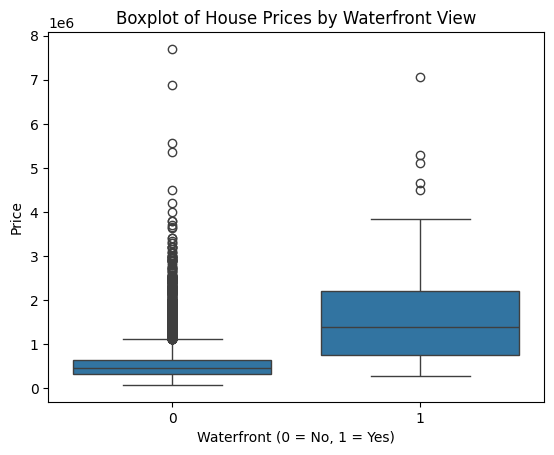

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for price based on waterfront view

sns.boxplot(x=df['waterfront'], y=df['price'])

# Add labels and title
plt.xlabel("Waterfront (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.title("Boxplot of House Prices by Waterfront View")

# Show the plot
plt.show()

Question-9 Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price

In [ ]:
sns.regplot(x='sqft_above',y='price',data=df,line_kws={'color': 'red'})

Question-10  Fit a linear regression model using the longitude feature 'long' and caculate the R^2.

In [ ]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149029567

Question-11 Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. 

In [ ]:
#Enter Your Code, Execute and take the Screenshot
lm = LinearRegression()
lm.fit(df[['sqft_living']],df['price'])
lm.score(df[['sqft_living']],Y)

0.4928532179037931

Question-12 Fit a linear regression model to predict the 'price' using the list of features and calulate the R^2

In [ ]:
lm = LinearRegression()
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"] 
Z=df[features]
lm.fit(Z,Y)
lm.score(Z,Y)

0.6576951666037507

Question-13 Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2. 

In [ ]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
Z=Z.astype('float')
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))


0.7513408515988734


Question-14 Split the data into training and testing sets

In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


Question-15 Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data

In [ ]:
ridgemodel=Ridge(alpha=0.1)
ridgemodel.fit(x_train,y_train)
ypredict=ridgemodel.predict(x_test)
print(r2_score(y_test,ypredict))

0.6478759163939105


Question-16 Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided

In [ ]:
pr=PolynomialFeatures(degree=2)
x_fit_train=pr.fit_transform(x_train)
x_fit_test=pr.transform(x_test)
ridgemodel=Ridge(alpha=0.1)
ridgemodel.fit(x_fit_train,y_train)
ypredict1=ridgemodel.predict(x_fit_test)
print(r2_score(y_test,ypredict1))

0.7002744252787184
